In [ ]:
import numpy as np
import pandas as pd
import cv2
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

60000
60000
10000
10000


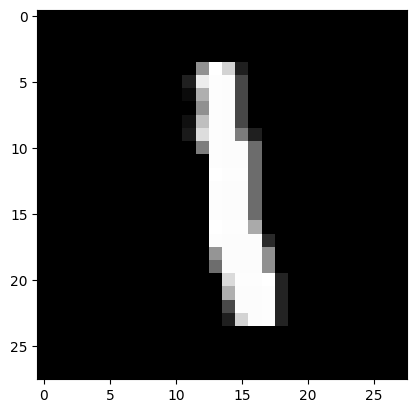

In [ ]:
plt.imshow(X_train[6], cmap='gray')

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train, 10)

In [ ]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_train, 10)

In [ ]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model = keras.Sequential(
        [keras.layers.Dense(10, input_shape=(784, ),
        activation='softmax')])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train_flattened, y_train, epochs =10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4693 - accuracy: 0.8770
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3041 - accuracy: 0.9148
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2837 - accuracy: 0.9201
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2731 - accuracy: 0.9241
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2621 - accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2584 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2556 - accuracy: 0.9298
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2533 - accuracy: 0.9299
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.250